In [1]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
from pandas.io.json import json_normalize # package for flattening json in pandas df
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

# 1. Data Preparation and Visualization
## 1. 1 Format check for the data

In [2]:
# Build a function to check if there is an error or disorder of the data
def errorCheck(filename):
    try:
        with open(filename) as f_in:
            data_origin = json.load(f_in)
        df = pd.DataFrame(data_origin)
        # Check if there is a format error in converting data
        df['DayTime'] = pd.to_datetime(df['login_time']) # convert the string to datetime format
        for i in range(df.shape[0] - 1):
            # Check if there is disorder of the time data
            if df.DayTime[i].to_pydatetime() > df.DayTime[i+1].to_pydatetime():
                print('There is a time disorder error')
                return False
        print('Good. It passes the error check.')
        return True
    except BaseException as e:
        print('There is something wrong:', e)
        return False

In [3]:
filepath = "/Users/Rockwell/Desktop/OperationResearch/logins.json"
errorCheck(filepath)

Good. It passes the error check.


True

## 1.2 Aggregation of login counts based on 15-min time intervals
Since the time data has the right format and order, we can take the following operation to count the number of logins in the 15min intervals.

In [4]:
with open(filepath) as f_in:
    data_origin = json.load(f_in)
df = pd.DataFrame(data_origin)
# Check if there is a format error in converting data
df['DayTime'] = pd.to_datetime(df['login_time'])

Let's first generate the 15min interval count list.
Since the data is in order, 
we can first calculate how many 15min intervals are there.
For tidiness and following the "quarter" time convention in English,
assume the first interval starts from '2010-01-01 00:00:00'.
(It's also fine to set the beginning time of the first interval to
 '2010-01-01 00:11:52', i.e., the first login time, but then the following
 15-min intervals looks not very reader friendly.)
Use the starting time of an interval to label the interval, so the first 
interval is indexed by '2010-01-01 00:00:00', which represent the interval
['2010-01-01 00:00:00', '2010-01-01 00:15:00'), NOTE: It's right-open,
i.e., the right endpoint '2010-01-01 00:15:00' is NOT included in the 
first interval.

In [5]:
timeRange = (df.DayTime[df.shape[0] - 1] - pd.to_datetime('2010-01-01 00:00:00')).total_seconds()
nInterval = int(timeRange // (15 * 60) + 1)
nInterval

23004

So there are totally 23004 intervals from '2010-01-01 00:00:00' to '2010-08-28 14:47:00'

In [6]:
# Let's make a dataframe count the number of each interval,
# initilized with 0, and indexed by the end time of each interval
interList = []
firstInter = pd.to_datetime('2010-01-01 00:00:00')
interStep = timedelta(seconds = 60 * 15)
for i in range(nInterval):
    interList.append(firstInter + i * interStep)
    
# Create a list to store the counts of logins each interval
countList = [0] * nInterval 

In [7]:
# Now, let's count the total number of logins in each interval
for i in range(df.shape[0]):
    numIndex = int((df.DayTime[i] - firstInter).total_seconds() // (60 * 15))
    # The above quotient corresponds the number index in dfCount
    countList[numIndex] += 1

# Build the dataframe for counting the number of each interval
countDict = {'Interval': interList, 'Counts': countList}
dfCount = pd.DataFrame(countDict)
dfCount.to_csv("/Users/Rockwell/Desktop/OperationResearch/aggCounts15min.csv")

The dataframe for login counts based on 15-min time interval is shown below

In [8]:
dfCount

,Interval,Counts
0,2010-01-01 00:00:00,3
1,2010-01-01 00:15:00,3
2,2010-01-01 00:30:00,7
3,2010-01-01 00:45:00,7
4,2010-01-01 01:00:00,5
5,2010-01-01 01:15:00,5
6,2010-01-01 01:30:00,7
7,2010-01-01 01:45:00,5
8,2010-01-01 02:00:00,7
9,2010-01-01 02:15:00,5


## 1.3 Visualization
 We first try to explore the monthly characteristics for the lognin counts.
 To get an overall impression of the data, let's first consider hourly counts instead of using the finner stepsize (15-min stepsize).

In [8]:
# Similarly, let's make a dataframe for the aggregated counts
# based on 1 hour time intervals. Interval indexing following the same rules
# as before, i.e., the first 1-hour interval is 
# ['2010-01-01 00:00:00', '2010-01-01 01:00:00'), left-closed, right-open.
nInterval_1h = int(timeRange // (60 * 60) + 1)
interList_1h = []
interStep_1h = timedelta(seconds = 60 * 60)
for i in range(nInterval_1h):
    interList_1h.append(firstInter + i * interStep_1h)
    
# Create a list to store the counts of logins each interval
countList_1h = [0] * nInterval_1h
for i in range(df.shape[0]):
    numIndex = int((df.DayTime[i] - firstInter).total_seconds() // (60 * 60))
    # The above quotient corresponds the number index in dfCount
    countList_1h[numIndex] += 1
# Build the dataframe for counting the number of each interval
countDict_1h = {'Interval': interList_1h, 'Counts': countList_1h}
dfCount_1h = pd.DataFrame(countDict_1h)

The dataframe for login counts based on 1-hour time interval is shown below

In [10]:
dfCount_1h

,Interval,Counts
0,2010-01-01 00:00:00,20
1,2010-01-01 01:00:00,22
2,2010-01-01 02:00:00,25
3,2010-01-01 03:00:00,21
4,2010-01-01 04:00:00,10
5,2010-01-01 05:00:00,6
6,2010-01-01 06:00:00,9
7,2010-01-01 07:00:00,7
8,2010-01-01 08:00:00,5
9,2010-01-01 09:00:00,5


In [9]:
# For convenience, add hour, week, month columns to the dataframe dfCount_1h
dfCount_1h['hour'] = dfCount_1h.Interval.dt.hour
dfCount_1h['week'] = dfCount_1h.Interval.dt.dayofweek 
#note that for the above dayofweek Monday is denoted by 0 and Sunday is 6.
dfCount_1h['month'] = dfCount_1h.Interval.dt.month

 Let's first take a look at the monthly total demand:

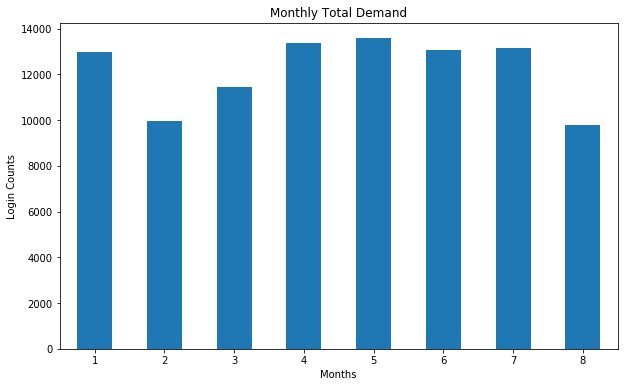

In [10]:
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('png','pdf')
totalMonthlyCount = pd.DataFrame(dfCount_1h.groupby('month')['Counts'].sum())
axMonthTotal = totalMonthlyCount.plot.bar(rot = 0, figsize = (10,6))
axMonthTotal.set_title('Monthly Total Demand')
axMonthTotal.set_ylabel('Login Counts')
axMonthTotal.set_xlabel('Months')
axMonthTotal.get_legend().remove()
plt.savefig("figure1.pdf")

From the above figure we can see Feb and August have the relatively low demand. But it should be mentioned that August data is not complete, since the last record is '2010-08-28 14:00:00'. So we don't have 8-29 to 8-31 data counted in the above figure.

Now let's take a look at hourly demand everyday in differnet months

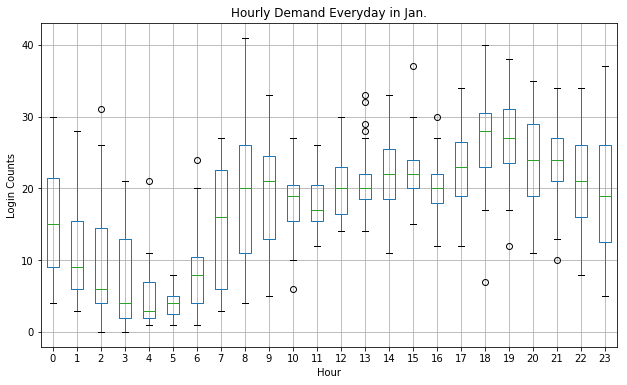

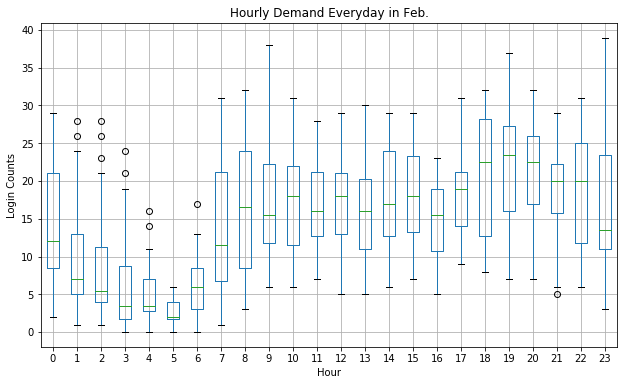

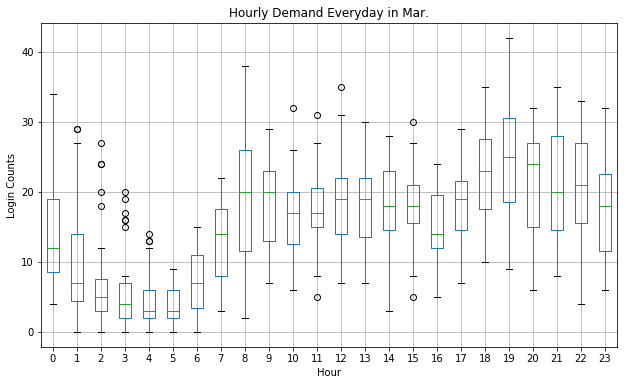

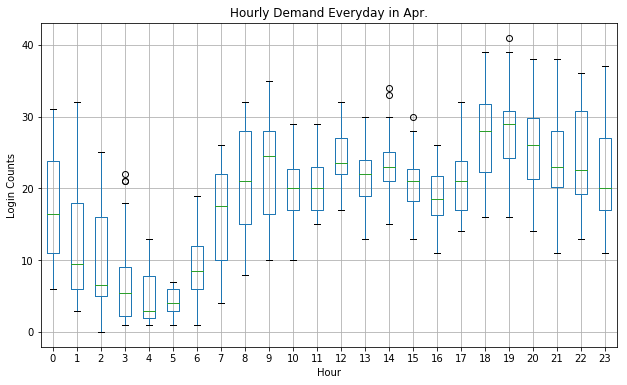

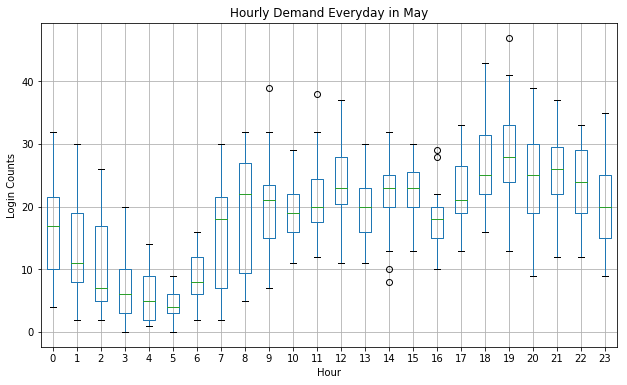

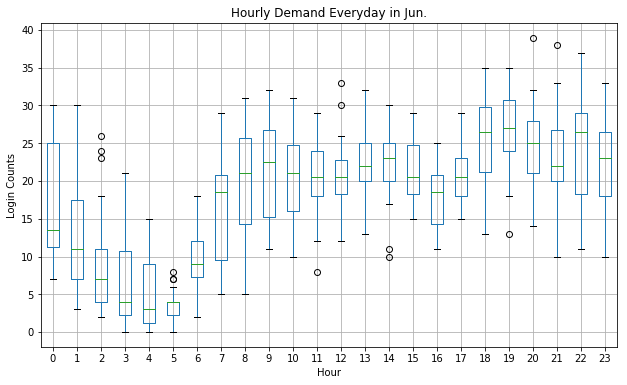

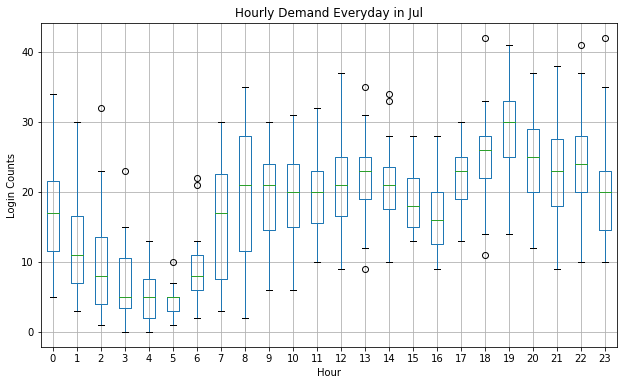

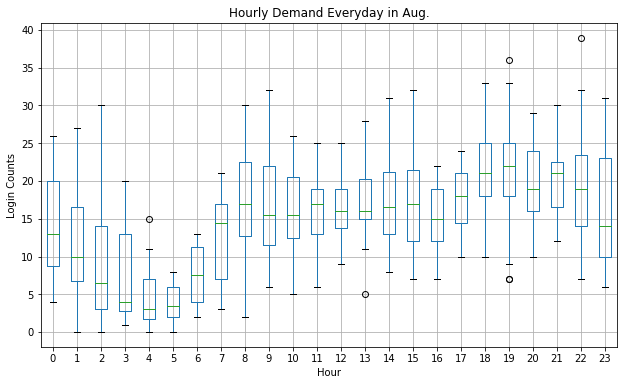

In [11]:
Months = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul', 'Aug.']
for i in range(1, 9):
    dfMonth = dfCount_1h[dfCount_1h.month == i]
    boxplotMonth = dfMonth.boxplot(column = 'Counts', by = 'hour', figsize=(10,6))
    boxplotMonth.set_title('Hourly Demand Everyday in ' + Months[i-1])
    boxplotMonth.set_xlabel('Hour')
    boxplotMonth.set_ylabel('Login Counts')
    plt.suptitle("")
    plt.savefig("figure_hourly_Month" + str(i) + ".pdf")

The above boxplots of hourly demand everyday in different months all show a common daily cycle of demand, that is from midnight 0am to 5am, the demand gradually decrease to the lowest point of a day, and from 6am to 8am-9am the demand jumps up, where 8-9am forms a short peak (but not the highest peak during a day). Then the demand starts to fluctuate a little bit and at around 4pm, the demand decreses to another valley point (but it's higher than the lowest one at 5am). Then from 4pm to 7pm, the demand starts increase again to the highest point of a day. Last, from 7pm to 11pm, the demand usually starts to go down again.

Some possible reasons behind this daily cycle could be that 1) from 0am to 5am, more and more people get to sleep, so demand decreases; 2) from 5am to 8-9am, people get up and go to work during weekdays, which may lead to a demand surge. 3) at noon the demand is flucuating a bit but not too much, probably because it's lunch time and people may or may not go to a restaurant that's far away from working place. 4) at 4pm most people would be at work and that may lead to a second valley point of a day. 5) from 5pm to 7pm people get off work and may get back home or go to resaurant to have dinner, so the demand increases again. 6) After that more and more people have been back home, so demand gradually decreases from 7pm to 11pm.

In addition, in the above boxplots, the outliers (circle points), which is the points outside 1.5 times the interquartile range above the upper quartile or below the lower quartile. Statistically, these data points might have data quality issues, sometimes we could remove those points before we analyze the data, and we may need to remove several times to make sure the edited data doesn't have outliers. But "statistically" doesn't mean it's always 100% correct, it's possible that the data points are correctly recorded from reality, so these outliers could be real existed outliers. Hence in this project, I treat these outliers as the true data and use them in the analysis instead of deleting them.

Let's then take a look at hourly AVERAGE demand (over all days in a month) in different months.

In [12]:
dfMonth = dfCount_1h[dfCount_1h.month == 1]
dfMeanMonth = dfMonth.groupby('hour').mean()

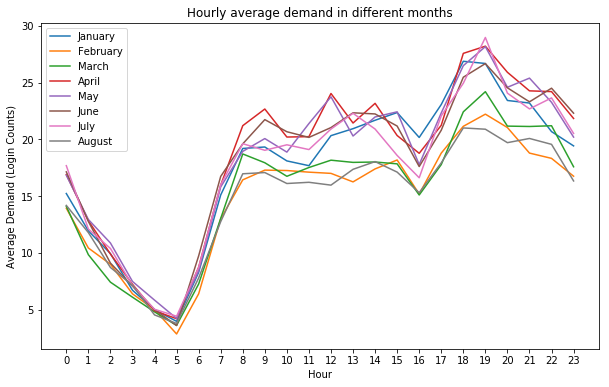

In [13]:
plt.figure(figsize = (10,6))
xtick = np.arange(0, 24, 0.25)
for i in range(1,9):
    dfMonth = dfCount_1h[dfCount_1h.month == i]
    dfMeanMonth = dfMonth.groupby('hour').mean()
    plt.plot('Counts', data = dfMeanMonth, label = date(1, i, 1).strftime('%B'))
plt.legend()
plt.xlabel('Hour')
plt.xticks(np.arange(0, 24))
plt.ylabel('Average Demand (Login Counts)')
plt.title('Hourly average demand in different months')
plt.savefig("figure2.pdf")
plt.show()

The above figure verifies our previous claim about the daily cycle of demand. Besides that it also shows daily demand curve basically remain the same over different months (from Jan to Aug.)

Next, we are going to explore the hourly demand for different days of a week

We first take a look at hourly demand in differnet days of a week

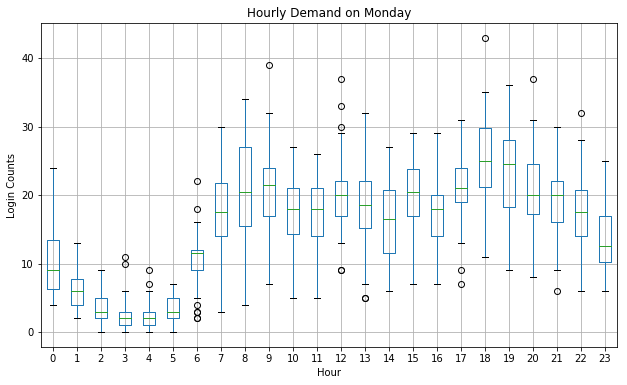

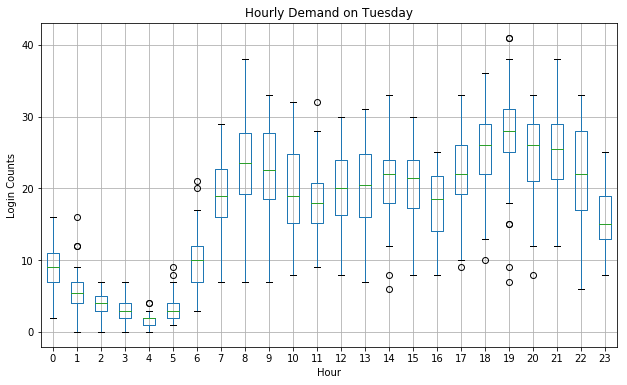

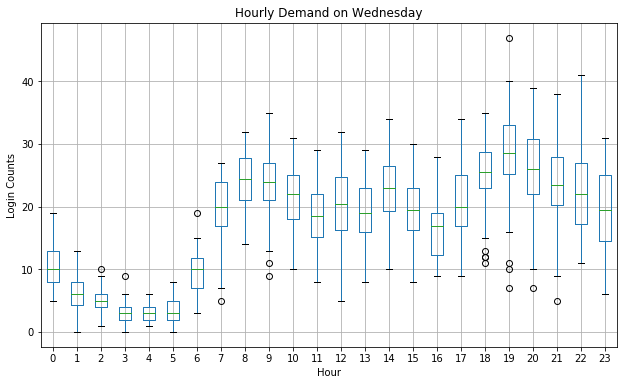

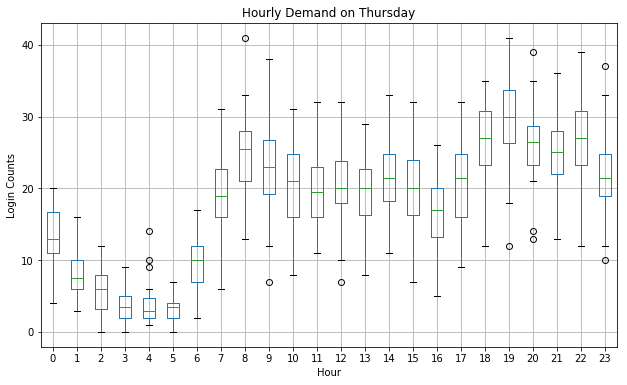

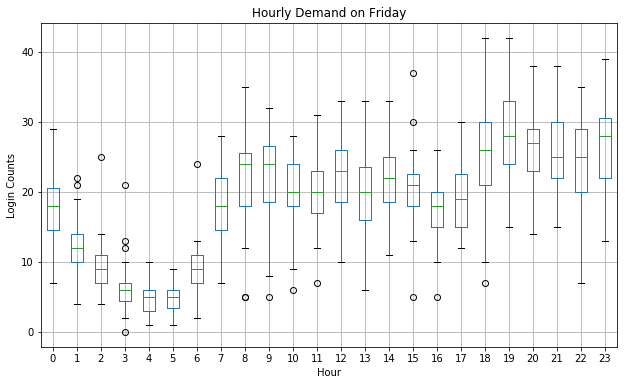

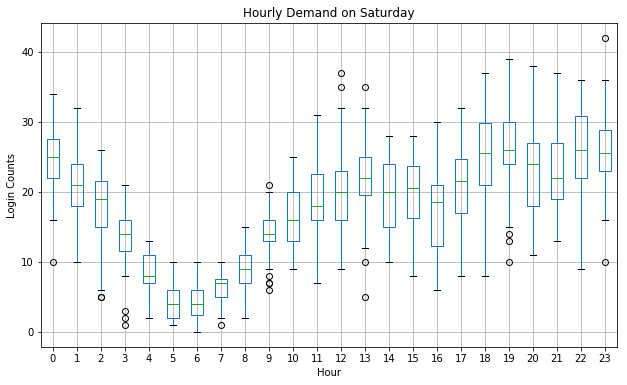

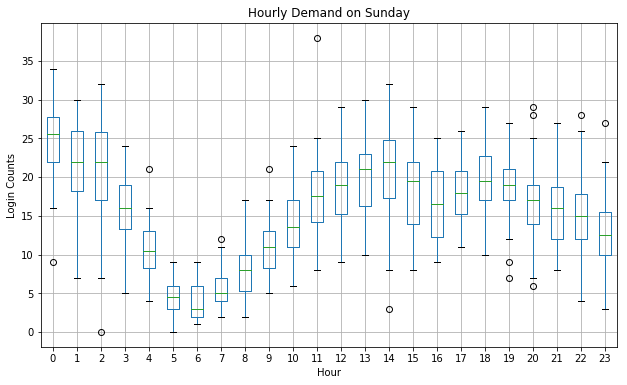

In [14]:
Weeks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i in range(0, 7):
    dfWeek = dfCount_1h[dfCount_1h.week == i]
    boxplotWeek = dfWeek.boxplot(column = 'Counts', by = 'hour', figsize=(10,6))
    boxplotWeek.set_title('Hourly Demand on ' + Weeks[i])
    boxplotWeek.set_xlabel('Hour')
    boxplotWeek.set_ylabel('Login Counts')
    plt.suptitle("")
    plt.savefig("figure_hourly_Week" + str(i+1) + ".pdf")

The above boxplots shows that weekdays' cycles are relatively similar to each other.
However weekends's daily cycles are quite different from weekdays'. First of all, for weekends the morning valley demand is about 1 hour later than that of week days (the lowest demand for weekends are about 6am but for weekdays it's 5 am). Second, for weekends, from 6am to 1-2pm the demand keeps increasing (since peole don't need to go to work), but for weekdays, the demand just increases till 9am (when people just get to the working place).   

Hourly AVERAGE demand in different days of a week is shown below

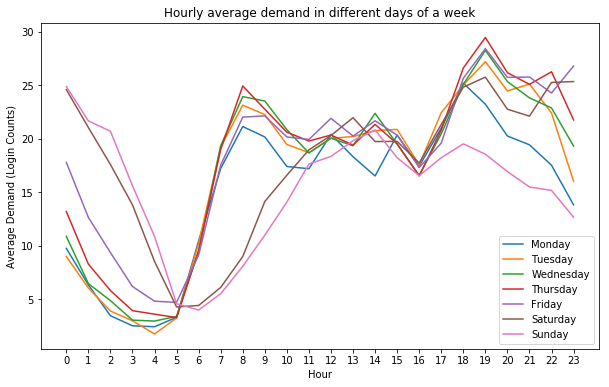

In [15]:
plt.figure(figsize = (10,6))
xtick = np.arange(0, 24, 0.25)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i in range(0,7):
    dfWeek = dfCount_1h[dfCount_1h.week == i]
    dfMeanWeek = dfWeek.groupby('hour').mean()
    plt.plot('Counts', data = dfMeanWeek, label = days[i])
plt.legend()
plt.xticks(np.arange(0, 24))
plt.xlabel('Hour')
plt.ylabel('Average Demand (Login Counts)')
plt.title('Hourly average demand in different days of a week')
plt.savefig("figure3.pdf")
plt.show()

Above figure again tells us Saturday and Sunday daily demand have a quite different demand pattern than the work days. So when we do prediction, it would be better to treat weekdays and weekend differently. For example, when predict the demand for weekends we'd better use the historical data of previous weekends instead of weekdays.

Similarly, we could take a finer stepsize, 15 min, and see what the quarterly average demand in different days of a week

In [16]:
# For convenience, add minute, week, month columns to the dataframe dfCount
dfCount['hour'] = dfCount.Interval.dt.hour
dfCount['minute'] = dfCount.Interval.dt.minute
dfCount['week'] = dfCount.Interval.dt.dayofweek 
#note that for the above dayofweek Monday is denoted by 0 and Sunday is 6.
dfCount['month'] = dfCount.Interval.dt.month
dfCount

,Interval,Counts,hour,minute,week,month
0,2010-01-01 00:00:00,3,0,0,4,1
1,2010-01-01 00:15:00,3,0,15,4,1
2,2010-01-01 00:30:00,7,0,30,4,1
3,2010-01-01 00:45:00,7,0,45,4,1
4,2010-01-01 01:00:00,5,1,0,4,1
5,2010-01-01 01:15:00,5,1,15,4,1
6,2010-01-01 01:30:00,7,1,30,4,1
7,2010-01-01 01:45:00,5,1,45,4,1
8,2010-01-01 02:00:00,7,2,0,4,1
9,2010-01-01 02:15:00,5,2,15,4,1


In [17]:
dfWeek = dfCount[dfCount.week == 1]
dfWeek.groupby(['hour','minute']).mean()

Counts  week  month
hour minute                       
0    0       2.470588   1.0    4.5
     15      2.470588   1.0    4.5
     30      1.852941   1.0    4.5
     45      2.205882   1.0    4.5
1    0       1.470588   1.0    4.5
     15      1.500000   1.0    4.5
     30      1.264706   1.0    4.5
     45      1.823529   1.0    4.5
2    0       1.147059   1.0    4.5
     15      1.029412   1.0    4.5
     30      0.970588   1.0    4.5
     45      0.764706   1.0    4.5
3    0       0.705882   1.0    4.5
     15      1.000000   1.0    4.5
     30      0.617647   1.0    4.5
     45      0.676471   1.0    4.5
4    0       0.617647   1.0    4.5
     15      0.352941   1.0    4.5
     30      0.352941   1.0    4.5
     45      0.441176   1.0    4.5
5    0       0.558824   1.0    4.5
     15      0.705882   1.0    4.5
     30      0.676471   1.0    4.5
     45      1.323529   1.0    4.5
6    0       1.647059   1.0    4.5
     15      2.117647   1.0    4.5
     30      3.088235   1.0    4.5
     45      3.382353   1.0    4.5
7    0       3.470588   1.0    4.5
     15      4.882353   1.0    4.5
...               ...   ...    ...
16   30      4.588235   1.0    4.5
     45      4.323529   1.0    4.5
17   0       5.029412   1.0    4.5
     15      5.352941   1.0    4.5
     30      5.441176   1.0    4.5
     45      6.617647   1.0    4.5
18   0       6.029412   1.0    4.5
     15      6.117647   1.0    4.5
     30      6.647059   1.0    4.5
     45      6.235294   1.0    4.5
19   0       6.764706   1.0    4.5
     15      6.764706   1.0    4.5
     30      6.911765   1.0    4.5
     45      6.764706   1.0    4.5
20   0       5.735294   1.0    4.5
     15      5.264706   1.0    4.5
     30      7.088235   1.0    4.5
     45      6.382353   1.0    4.5
21   0       6.588235   1.0    4.5
     15      5.794118   1.0    4.5
     30      6.588235   1.0    4.5
     45      6.147059   1.0    4.5
22   0       6.117647   1.0    4.5
     15      5.794118   1.0    4.5
     30      5.264706   1.0    4.5
     45      5.235294   1.0    4.5
23   0       4.647059   1.0    4.5
     15      4.588235   1.0    4.5
     30      3.647059   1.0    4.5
     45      3.147059   1.0    4.5

[96 rows x 3 columns]

The quarterly(15min) AVERAGE demand in different days of a week is shown below

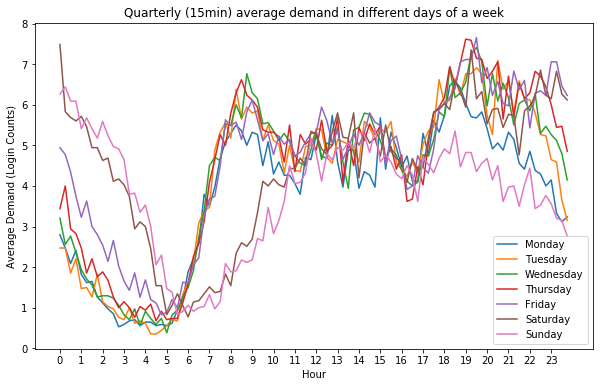

In [18]:
plt.figure(figsize = (10,6))
xtick = np.arange(0, 24, 0.25)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i in range(0,7):
    dfWeek = dfCount[dfCount.week == i]
    dfMeanWeek = dfWeek.groupby(['hour', 'minute']).mean().reset_index()
    dfMeanWeekArr = dfMeanWeek['Counts'].values
    plt.plot(xtick, dfMeanWeekArr, label = days[i])
plt.legend(loc = 4)
plt.xlabel('Hour')
plt.xticks(np.arange(0, 24))
plt.ylabel('Average Demand (Login Counts)')
plt.title('Quarterly (15min) average demand in different days of a week')
plt.savefig("figure4.pdf")
plt.show()

The above figure is based on 15-min intervals. It shows more details. But since it looks more crowded than the 1-hour average demand figure shown before, I would say from a visualization perspective, this figure may not be as reader friendly as the 1-hour one.

# 2 Demand Prediction. 
## 2.1 Predict the next-hour demand

Having the above figure, we can intuitively realize that it would be important to use the right features to predict the future demand. So, for a "better" prediction, we initially decide to choose the following machine learning model: I'll use Long Short Term Memory (LSTM) recurrent neural network to make the prediction, also the input variable for predicting demand x_t+1 are choosen from the last 3 hour demand data, and the data from last 3 same days of a week with 3 hour range around the same time as x_t+1. For example, if I want to predict the demand x at 14 : 00 : 00 in March 3, 2010 (Wednesday), the input variables to LSTM network would be demand from 11: 00 : 00 to 13 : 45 : 00 (both included), and demand data from 12 : 00 : 00 to 14 : 45 : 00 for the last three same days of week, i.e., Feb 24, Feb 17, Feb 10 2010, since they are the last three wednesdays.

Note that in this project I don't consider the traditional hollidays, since I have no information where the location is or which contry it belongs to.

Also, notice our data is in fact "user logins" data, instead of "real demand of trips", but empirically speaking, people's logins are usually related to their trip needs. So in this project I simply assume these two thing are the same, but it's worth mentioning that in practice, we need to use real trip data to make the prediction instead of just login data.

In [19]:
# Let data from Janurary to July (included) be the training data
training_set = dfCount[dfCount.month <= 7].iloc[:, 1:2].values.astype(float)

# Normalize the feature values to be within [0, 1]
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_nor = sc.fit_transform(training_set)

# Create the input data series with previous 3-hour data 
# and 3 last same days of week with data around the same time 
# (2-hour data before and 1-hour data after).
X_train = []
y_train = []
for i in range(2024, len(training_set)):
    X_train.append(np.concatenate((training_set_nor[i - 2024 : i - 2012, 0],
                                  training_set_nor[i - 1352 : i - 1340, 0],
                                  training_set_nor[i - 680 : i - 668, 0],
                                  training_set_nor[i - 12 : i, 0]))) # these indexes are generated based on the approach we introduced in the beginning of this section 
    y_train.append(training_set_nor[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data for training
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Now let's creat the LSTM neural network

In [21]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3" 
# above for fixing some numpy warning leading to kernel interruption

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

network = Sequential()
network.add(LSTM(units = 48, return_sequences = True, 
                 input_shape = (X_train.shape[1], 1)))
network.add(Dropout(0.2))
network.add(LSTM(units = 48, return_sequences = True, 
                 input_shape = (X_train.shape[1], 1)))
network.add(Dropout(0.2))
network.add(LSTM(units = 48, return_sequences = True, 
                 input_shape = (X_train.shape[1], 1)))
network.add(Dropout(0.2))
network.add(LSTM(units = 48))
network.add(Dropout(0.2))
network.add(Dense(units = 1))

network.compile(optimizer = 'adam', loss = 'mse')
network.fit(X_train, y_train, epochs = 10, batch_size = 50)

Epoch 1/10
18328/18328 [==============================] - 68s 4ms/step - loss: 0.0159
Epoch 2/10
18328/18328 [==============================] - 64s 3ms/step - loss: 0.0146
Epoch 3/10
18328/18328 [==============================] - 60s 3ms/step - loss: 0.0136
Epoch 4/10
18328/18328 [==============================] - 62s 3ms/step - loss: 0.0132
Epoch 5/10
18328/18328 [==============================] - 63s 3ms/step - loss: 0.0130
Epoch 6/10
18328/18328 [==============================] - 63s 3ms/step - loss: 0.0129
Epoch 7/10
18328/18328 [==============================] - 64s 3ms/step - loss: 0.0128
Epoch 8/10
18328/18328 [==============================] - 59s 3ms/step - loss: 0.0127
Epoch 9/10
18328/18328 [==============================] - 56s 3ms/step - loss: 0.0126
Epoch 10/10
18328/18328 [==============================] - 56s 3ms/step - loss: 0.0127


In the above network, I choose epochs = 10, since by 10 epochs the loss has started to converge.

In [23]:
# prepare the test data set's input data
inputData = dfCount.iloc[len(training_set) - 2024 : , 1:2].values.astype(float)
inputData_nor = sc.transform(inputData)
X_test = []
for i in range(2024, len(inputData)):
    X_test.append(np.concatenate((inputData_nor[i - 2024 : i - 2012, 0],
                                  inputData_nor[i - 1352 : i - 1340, 0],
                                  inputData_nor[i - 680 : i - 668, 0],
                                  inputData_nor[i - 12 : i, 0])))
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_demand_nor = network.predict(X_test)
predicted_demand = sc.inverse_transform(predicted_demand_nor)

The predicted demand and real demand using LSTM network is ploted below. (Take day 2010-08-01 as an example)

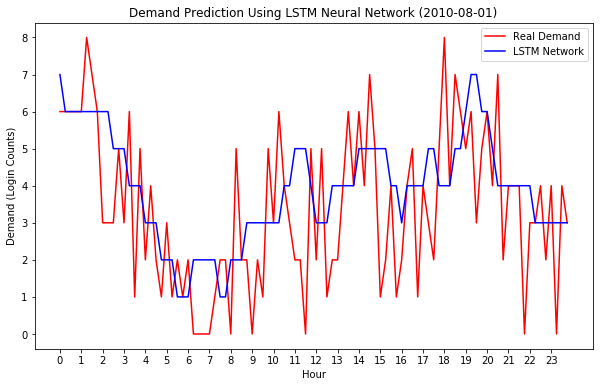

In [24]:
# Plot the predicted demand and real demand
real_demand = dfCount.iloc[len(training_set) : , 1:2].values.astype(float)
plt.figure(figsize=(10, 6))
plt.plot(xtick, real_demand[0:96], color = 'red', label = 'Real Demand')
plt.plot(xtick, np.round(predicted_demand[0:96]), color = 'blue', label = 'LSTM Network')
temp_demand = real_demand[0:96].copy()
temp_demand[1::4] = temp_demand[0::4]
temp_demand[2::4] = temp_demand[0::4]
temp_demand[3::4] = temp_demand[0::4]
plt.legend(loc = 1)
plt.xlabel('Hour')
plt.xticks(np.arange(0, 24))
plt.ylabel('Demand (Login Counts)')
plt.title('Demand Prediction Using LSTM Neural Network (2010-08-01)')
plt.savefig("figure5.pdf")
plt.show()

In [26]:
# Average absolute prediction error is
print('The average absolute prediction error using LSTM is', np.mean(np.absolute(np.around(predicted_demand[0:96]) - real_demand[0:96])))

The average absolute prediction error using LSTM is 1.3541666666666667


Now we will provide the prediction of demand in the following 1 hour (2010-08-28 15:00:00 - 2010-08-28 15:45:00) by using LSTM network.

In [28]:
# Using LSTM network
nextHour = ['2010-08-28 15:00:00', '2010-08-28 15:15:00', '2010-08-28 15:30:00', '2010-08-28 15:45:00']
predicted_demand2 = np.array([])
inputData = dfCount.iloc[len(training_set) - 2024 : , 1:2].values.astype(float)
inputData_nor = sc.transform(inputData)
for j in range(4):
    i = len(inputData) - 1 + j
    X_test2 = [np.concatenate((inputData_nor[i - 2024 : i - 2012, 0],
                                      inputData_nor[i - 1352 : i - 1340, 0],
                                      inputData_nor[i - 680 : i - 668, 0],
                                      inputData_nor[i - 12 : i, 0]))]

    X_test2 = np.array(X_test2)
    X_test2 = np.reshape(X_test2, (1, X_test2.shape[1], X_test2.shape[0]))
    predicted_demand_nor2 = network.predict(X_test2)
    predicted_demand2 = sc.inverse_transform(predicted_demand_nor2)
    inputData_nor = np.concatenate((inputData_nor, predicted_demand_nor2))
forecast = np.ceil(sc.inverse_transform(inputData_nor[-4:]))
print('Using LSTM, forecast for the 4 following 15-min demand from 2010-08-28 15:00:00 to 15:45:00 is') 
for j in range(4):
    print(int(forecast[j]), "login counts,", nextHour[j])

Using LSTM, forecast for the 4 following 15-min demand from 2010-08-28 15:00:00 to 15:45:00 is
4 login counts, 2010-08-28 15:00:00
5 login counts, 2010-08-28 15:15:00
5 login counts, 2010-08-28 15:30:00
5 login counts, 2010-08-28 15:45:00


## 2.2. Forecast performance and accuracy

In [30]:
# Using LSTM network
# Combine the training data and test data together
totalData = dfCount.iloc[: , 1:2].values.astype(float)
totalData_nor = sc.transform(totalData)
lenTest = len(totalData) - len(training_set) - 3
mse = 0 # mean square error
mae = 0 # mean absolute error
for i in range(len(training_set), len(totalData)-3):
    if i % 100 == 0:
        print('Please wait, %' + str(int(round((i - len(training_set))/lenTest,2)*100)) + 
              ' has been finished.' )
    temp_inputData_nor = totalData_nor[:i]
    for j in range(4):
        X_test2 = [np.concatenate((temp_inputData_nor[i+j - 2024 : i+j - 2012, 0],
                                          temp_inputData_nor[i+j - 1352 : i+j - 1340, 0],
                                          temp_inputData_nor[i+j - 680 : i+j - 668, 0],
                                          temp_inputData_nor[i+j - 12 : i+j, 0]))]

        X_test2 = np.array(X_test2)
        X_test2 = np.reshape(X_test2, (1, X_test2.shape[1], X_test2.shape[0]))
        predicted_demand_nor2 = network.predict(X_test2)
#         predicted_demand2 = sc.inverse_transform(predicted_demand_nor2)
        temp_inputData_nor = np.concatenate((temp_inputData_nor, predicted_demand_nor2))
    forecast = sc.inverse_transform(temp_inputData_nor[-4:])
    # calculate square error and aggregate
    mse += np.sum(np.square(forecast - totalData_nor[i : i+4]))
    mae += np.sum(np.absolute(forecast - totalData_nor[i : i+4]))
# calculate the mean square error
mse = mse / (lenTest * 4)
mae = mae / (lenTest * 4)
print('The mean square error of LSTM network for August demand prediction is: ', mse)
print('The mean absolute error of LSTM network for August demand prediction is: ', mae)

Please wait, %2 has been finished.
Please wait, %6 has been finished.
Please wait, %9 has been finished.
Please wait, %13 has been finished.
Please wait, %17 has been finished.
Please wait, %21 has been finished.
Please wait, %24 has been finished.
Please wait, %28 has been finished.
Please wait, %32 has been finished.
Please wait, %36 has been finished.
Please wait, %40 has been finished.
Please wait, %43 has been finished.
Please wait, %47 has been finished.
Please wait, %51 has been finished.
Please wait, %55 has been finished.
Please wait, %57 has been finished.
Please wait, %62 has been finished.
Please wait, %66 has been finished.
Please wait, %70 has been finished.
Please wait, %74 has been finished.
Please wait, %77 has been finished.
Please wait, %81 has been finished.
Please wait, %85 has been finished.
Please wait, %89 has been finished.
Please wait, %92 has been finished.
Please wait, %96 has been finished.
Please wait, %100 has been finished.
The mean square error of LSTM 

The mean square error (MSE) of the demand prediction in the following 1 hour using LSTM network is given below.

## 2.3 Forecast for a week ahead

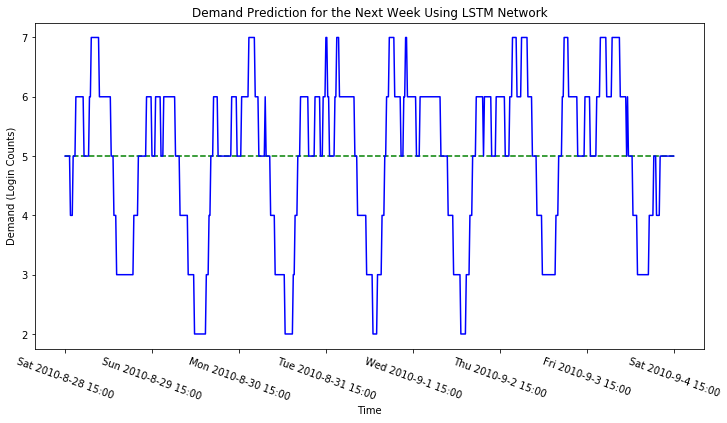

In [25]:
# Using LSTM network
nextWeek = ['Sat 2010-8-28 15:00', 'Sun 2010-8-29 15:00', 'Mon 2010-8-30 15:00',
            'Tue 2010-8-31 15:00', 'Wed 2010-9-1 15:00', 'Thu 2010-9-2 15:00', 
            'Fri 2010-9-3 15:00', 'Sat 2010-9-4 15:00']
predicted_demand2 = np.array([])
fig_week = plt.figure(figsize=(12,6))
ax_week = fig_week.add_subplot(111)
inputData = dfCount.iloc[len(training_set) - 2024 : , 1:2].values.astype(float)
inputData_nor = sc.transform(inputData)
xtick = np.arange(0, 24*7 + 0.25, 0.25)
for j in range(96 * 7 + 1):
    i = len(inputData) - 1 + j
    X_test2 = [np.concatenate((inputData_nor[i - 2024 : i - 2012, 0],
                                      inputData_nor[i - 1352 : i - 1340, 0],
                                      inputData_nor[i - 680 : i - 668, 0],
                                      inputData_nor[i - 12 : i, 0]))]

    X_test2 = np.array(X_test2)
    X_test2 = np.reshape(X_test2, (1, X_test2.shape[1], X_test2.shape[0]))
    predicted_demand_nor2 = network.predict(X_test2)
    predicted_demand2 = sc.inverse_transform(predicted_demand_nor2)
    inputData_nor = np.concatenate((inputData_nor, predicted_demand_nor2))
forecast = np.ceil(sc.inverse_transform(inputData_nor[- 96 * 7 - 1 :]))
ax_week.plot(xtick, np.ones(len(forecast)) * 5, color = 'green', linestyle = 'dashed')
ax_week.plot(xtick, np.round(forecast), color = 'blue')
ax_week.set_xticks(np.arange(0, 24*7 + 1, 24))
ax_week.set_xticklabels(nextWeek, rotation=-20)
ax_week.set_xlabel('Time')
ax_week.set_ylabel('Demand (Login Counts)')
plt.title('Demand Prediction for the Next Week Using LSTM Network')
plt.savefig("figure6.pdf")
plt.show()
